In [1]:
pip install pymc arviz pandas matplotlib seaborn

  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.5/552.5 kB 261.8 kB/s  0:00:01m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 185.3 kB/s  0:00:12 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 343.4 kB/s  0:00:05 eta 0:00:01
Using cached filelock-3.20.3-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 667.2 kB/s  0:00:02 eta 0:00:01
  Attempting uninstall: filelock
    Found existing installation: filelock 3.13.1
    Uninstalling filelock-3.13.1:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/16 [filelock]
      Successfully uninstalled filelock-3.13.1━━━━━━━━━━━━━━━━  4/16 [filelock]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [pymc]2m15/16 [pymc]]or]it-py]
Note: you may need to restart the kernel to use updated packages.


>>> OBSERVED RAW DATA (Notice Dr. B and Dr. D)
  doctor    n  successes  raw_rate
1  Dr. B    4          4     1.000
2  Dr. C  200        167     0.835
0  Dr. A  100         81     0.810
4  Dr. E   50         34     0.680
3  Dr. D    5          0     0.000


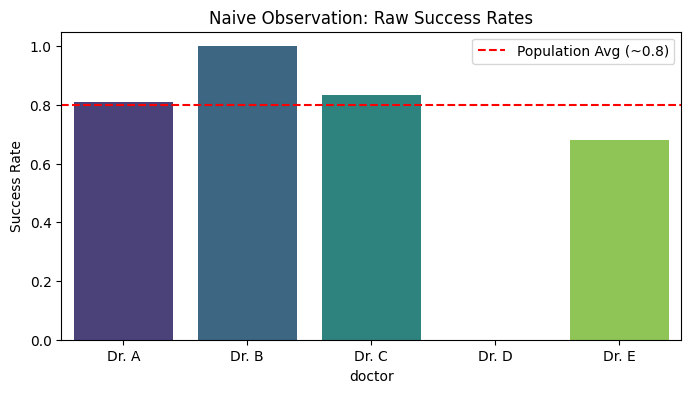

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

SEED = 42
np.random.seed(SEED)

def generate_data():
    doctors = [
        {'id': 'Dr. A', 'n_surgeries': 100, 'true_prob': 0.80}, 
        {'id': 'Dr. B', 'n_surgeries': 4,   'true_prob': 0.50}, 
        {'id': 'Dr. C', 'n_surgeries': 200, 'true_prob': 0.85}, 
        {'id': 'Dr. D', 'n_surgeries': 5,   'true_prob': 0.60}, 
        {'id': 'Dr. E', 'n_surgeries': 50,  'true_prob': 0.75}, 
    ]
    
    data = []
    for dr in doctors:
        if dr['id'] == 'Dr. B':
            successes = 4 
        elif dr['id'] == 'Dr. D':
            successes = 0 
        else:
            successes = np.random.binomial(dr['n_surgeries'], dr['true_prob'])
            
        data.append({
            'doctor': dr['id'],
            'n': dr['n_surgeries'],
            'successes': successes,
            'raw_rate': successes / dr['n_surgeries']
        })
        
    return pd.DataFrame(data)

df = generate_data()

print(">>> OBSERVED RAW DATA (Notice Dr. B and Dr. D)")
print(df[['doctor', 'n', 'successes', 'raw_rate']].sort_values('raw_rate', ascending=False))

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='doctor', y='raw_rate', hue='doctor', palette='viridis', legend=False)
plt.axhline(0.8, color='red', linestyle='--', label='Population Avg (~0.8)')
plt.title("Naive Observation: Raw Success Rates")
plt.ylabel("Success Rate")
plt.legend()
plt.show()